In [1]:
# Analysis of Baby Names over the years taken from the US Social Security website

In [2]:
import math
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [60]:
# limit the amount of default rows you see on a dataframe
pd.options.display.max_rows = 10

In [61]:
# unzip names file
import zipfile

In [4]:
zipfile.ZipFile('Data/names.zip').extractall('.')

In [5]:
ls

 Volume in drive C is OSDisk
 Volume Serial Number is 0AE2-276B

 Directory of C:\Users\cmosher\Documents\GitHub Programs

07/28/2020  01:58 PM    <DIR>          .
07/28/2020  01:58 PM    <DIR>          ..
07/28/2020  01:54 PM    <DIR>          .ipynb_checkpoints
07/27/2020  05:39 PM           209,568 Anagram Finder.ipynb
07/28/2020  01:56 PM             1,098 Baby Name Data - Pandas Example.ipynb
07/23/2020  04:27 PM           741,824 Back-Test-Strategy - Red White Blue Method.ipynb
07/23/2020  05:10 PM         8,063,542 Books_reviews_10000.json
07/14/2020  01:54 PM            56,627 CM_Resume.docx
07/28/2020  01:56 PM    <DIR>          Data
07/14/2020  01:31 PM            45,386 JobDescription.docx
07/27/2020  01:05 PM           151,198 Machine Learning SciKit Learn NLP Classifiers.ipynb
07/23/2020  03:59 PM           140,819 Mark Minervini Method - Stock Screener.ipynb
07/28/2020  01:58 PM    <DIR>          names
07/28/2020  11:48 AM           494,856 NumPy Weather Data.ipynb
07/22/

In [6]:
# Extracted many text files sorted by Year of Birth #### 
ls names

 Volume in drive C is OSDisk
 Volume Serial Number is 0AE2-276B

 Directory of C:\Users\cmosher\Documents\GitHub Programs\names

07/28/2020  01:58 PM    <DIR>          .
07/28/2020  01:58 PM    <DIR>          ..
07/28/2020  01:58 PM           316,364 NationalReadMe.pdf
07/28/2020  01:58 PM            24,933 yob1880.txt
07/28/2020  01:58 PM            24,065 yob1881.txt
07/28/2020  01:58 PM            26,559 yob1882.txt
07/28/2020  01:58 PM            26,002 yob1883.txt
07/28/2020  01:58 PM            28,670 yob1884.txt
07/28/2020  01:58 PM            28,625 yob1885.txt
07/28/2020  01:58 PM            29,822 yob1886.txt
07/28/2020  01:58 PM            29,531 yob1887.txt
07/28/2020  01:58 PM            33,064 yob1888.txt
07/28/2020  01:58 PM            32,297 yob1889.txt
07/28/2020  01:58 PM            33,621 yob1890.txt
07/28/2020  01:58 PM            33,186 yob1891.txt
07/28/2020  01:58 PM            36,542 yob1892.txt
07/28/2020  01:58 PM            35,433 yob1893.txt
07/28/2020  01:5

In [7]:
open('names/yob2011.txt','r').readlines()[:10]

['Sophia,F,21842\n',
 'Isabella,F,19910\n',
 'Emma,F,18803\n',
 'Olivia,F,17322\n',
 'Ava,F,15503\n',
 'Emily,F,14258\n',
 'Abigail,F,13248\n',
 'Madison,F,12389\n',
 'Mia,F,11530\n',
 'Chloe,F,10991\n']

In [9]:
# looks like data is in csv format: name,sex,number of babies born that year with that name
# read into pandas
df2011 = pd.read_csv('names/yob2011.txt')

In [11]:
df2011.head()

,Sophia,F,21842
0,Isabella,F,19910
1,Emma,F,18803
2,Olivia,F,17322
3,Ava,F,15503
4,Emily,F,14258


In [13]:
# bit of a mess up of the first name, need to put in columns
df2011 = pd.read_csv('names/yob2011.txt', names = ['name','sex','count'])

In [14]:
df2011.head()

,name,sex,count
0,Sophia,F,21842
1,Isabella,F,19910
2,Emma,F,18803
3,Olivia,F,17322
4,Ava,F,15503


In [28]:
# concat data frames for every year of text file
allyears = pd.concat(pd.read_csv(f'names/yob{year}.txt', names=['name','sex','count']).assign(year=year)
                    for year in range(1880,2019))

In [29]:
allyears.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1957046 entries, 0 to 32032
Data columns (total 4 columns):
name     object
sex      object
count    int64
year     int64
dtypes: int64(2), object(2)
memory usage: 74.7+ MB


In [30]:
allyears.describe()

,count,year
count,1.957046e+06,1.957046e+06
mean,1.796856e+02,1.975563e+03
std,1.522804e+03,3.419121e+01
min,5.000000e+00,1.880000e+03
25%,7.000000e+00,1.952000e+03
50%,1.200000e+01,1.985000e+03
75%,3.200000e+01,2.004000e+03
max,9.968900e+04,2.018000e+03


In [31]:
allyears.head()

,name,sex,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [32]:
allyears.tail()

,name,sex,count,year
32028,Zylas,M,5,2018
32029,Zyran,M,5,2018
32030,Zyrie,M,5,2018
32031,Zyron,M,5,2018
32032,Zzyzx,M,5,2018


In [33]:
#set the dataframe to a multi index
allyears = allyears.set_index(['sex','name','year']).sort_index()

In [34]:
allyears.head()

count
sex name  year       
F   Aabha 2011      7
          2012      5
          2014      9
          2015      7
          2016      7

In [63]:
allyears.loc[('F','Mary')]

,count
year,
1880,7065
1881,6919
1882,8148
1883,8012
1884,9217
...,...
2014,2632
2015,2631
2016,2508


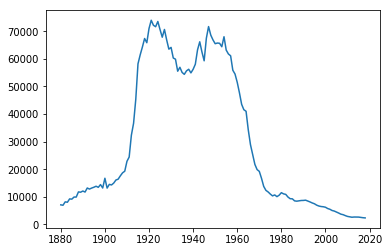

In [64]:
# plot up female and mary to see how many mary's there were over the years
plt.plot(allyears.loc[('F','Mary')])

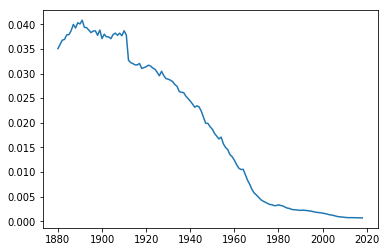

In [65]:
# see how many mary's were named in respect to all babies born 
# Maries were very popular in the 1880-1920 even though there were more mary's named from 1920-1980
plt.plot(allyears.loc[('F','Mary')]/ allyears.groupby('year').sum())

In [66]:
# define functions to make these plots so that we can easily compare multiple names for sex
def plotname(sex,name):
    
    data = allyears.loc[(sex,name)]
    
    plt.plot(data.index,data.values,label=name)
    plt.axis(xmin=1880,xmax=2018)

In [67]:
# define a function that takes in multiple names and compares
def comparenames(sex,names):
        plt.figure(figsize = (12,6))
        
        for name in names:
            plotname(sex,name)
            
        plt.legend()

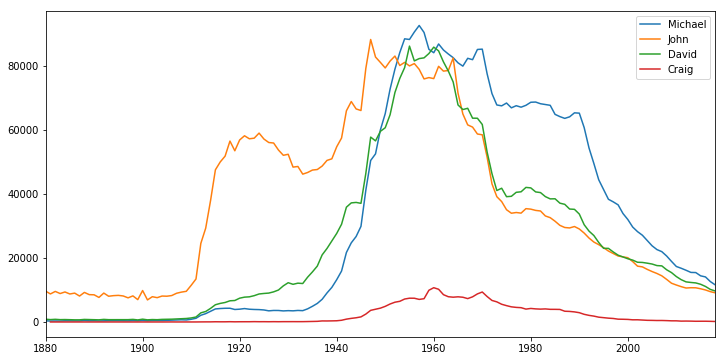

In [68]:
comparenames('M',['Michael','John','David','Craig'])

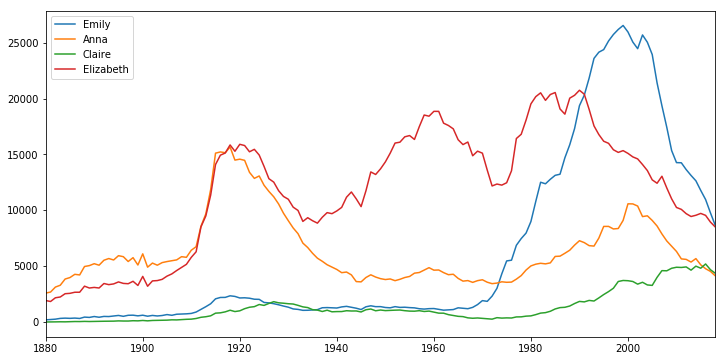

In [69]:
comparenames('F',['Emily','Anna','Claire','Elizabeth'])

In [70]:
girls=['Emily','Anna','Claire','Elizabeth']

In [71]:
# make a stacked plot that adds up the counts on top of each other
allyears.loc[('F',girls),:].head(20)

count
sex name year       
F   Anna 1880   2604
         1881   2698
         1882   3143
         1883   3306
         1884   3860
...              ...
         1895   5950
         1896   5860
         1897   5429
         1898   5773
         1899   5115

[20 rows x 1 columns]

In [72]:
# Unpack year from an index to a column 
allyears.loc[('F',girls),:].unstack(level=2)

count                                                        \
year           1880  1881  1882  1883  1884  1885  1886  1887  1888  1889   
sex name                                                                    
F   Anna       2604  2698  3143  3306  3860  3994  4283  4227  4982  5062   
    Claire       21    23    30    38    33    49    61    58    73    62   
    Elizabeth  1939  1852  2186  2255  2549  2582  2680  2681  3224  3058   
    Emily       210   244   272   342   364   346   369   335   457   429   

               ...                                                          \
year           ...   2009   2010   2011   2012   2013   2014   2015   2016   
sex name       ...                                                           
F   Anna       ...   6804   6329   5663   5618   5380   5689   5130   4784   
    Claire     ...   4824   4915   4896   4944   4656   5014   4829   5209   
    Elizabeth  ...  11035  10262  10091   9708   9454   9564   9730   9555   
    Emily      ...  15352  14274  14258  13649  13126  12647  11786  10972   

                           
year           2017  2018  
sex name                   
F   Anna       4544  4145  
    Claire     4693  4379  
    Elizabeth  8955  8513  
    Emily      9781  8656  

[4 rows x 139 columns]

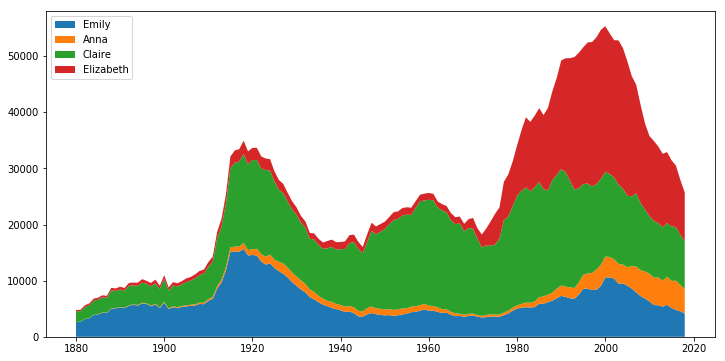

In [74]:
plt.figure(figsize=(12,6))
plt.stackplot(range(1880,2019),allyears.loc[('F',girls),:].unstack(level=2).fillna(0),labels=girls)
plt.legend(loc='upper left')

In [167]:
# Reset the data and look at the yearly top 10 names 
allyears = pd.concat(pd.read_csv(f'names/yob{year}.txt', names=['name','sex','count']).assign(year=year)
                    for year in range(1880,2019))

In [168]:
allyears.head()

,name,sex,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [169]:
#allyears = allyears.set_index(['sex','year','name']).sort_index()

In [173]:
byyear = allyears.set_index(['sex','year','name']).sort_index()

In [174]:
byyear.head()

count
sex year name          
F   1880 Abbie       71
         Abby         6
         Abigail     12
         Ada        652
         Adah        24

In [175]:
# sort by most popular names based on highest count 
byyear.loc['M',2018].sort_values('count',ascending=False)

,count
name,
Liam,19837
Noah,18267
William,14516
James,13525
Oliver,13389
...,...
Shiro,5
Shishir,5
Ikshan,5


In [176]:
# the top 10 male names for 2018 were!!!!: 
byyear.loc['M',2018].sort_values('count',ascending=False).head(10)

,count
name,
Liam,19837
Noah,18267
William,14516
James,13525
Oliver,13389
Benjamin,13381
Elijah,12886
Lucas,12585
Mason,12435


In [177]:
#the top 10 female names for 2018 were!!!:
byyear.loc['F',2018].sort_values('count',ascending=False).head(10)

,count
name,
Emma,18688
Olivia,17921
Ava,14924
Isabella,14464
Sophia,13928
Charlotte,12940
Mia,12642
Amelia,12301
Harper,10582


In [178]:
# Create a top 10 dataframe of names per year based on sex.  reset_index changes 2018 to a top 10 list
byyear.loc['F',2018].sort_values('count',ascending=False).head(10).reset_index().name

0         Emma
1       Olivia
2          Ava
3     Isabella
4       Sophia
5    Charlotte
6          Mia
7       Amelia
8       Harper
9       Evelyn
Name: name, dtype: object

In [179]:
# Create a funciton that does this for a number of years 
def getyear(sex,year):
    return (byyear.loc[sex,year]                   # Select 'M/F' and the year
           .sort_values('count',ascending = False) # Sort the values by most common count
           .head(10)                               # choose top ten
           .reset_index()                          # Reset the index so it says 0-10 instead of the year
           .name)                                  # Return the name only string

In [180]:
# Run the function and compile it into a dataframe
pd.DataFrame({year: getyear('M',year) for year in range(2010,2019)})

,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Jacob,Jacob,Jacob,Noah,Noah,Noah,Noah,Liam,Liam
1,Ethan,Mason,Mason,Jacob,Liam,Liam,Liam,Noah,Noah
2,Michael,William,Ethan,Liam,Mason,Mason,William,William,William
3,Jayden,Jayden,Noah,Mason,Jacob,Jacob,Mason,James,James
4,William,Noah,William,William,William,William,James,Logan,Oliver
5,Alexander,Michael,Liam,Ethan,Ethan,Ethan,Benjamin,Benjamin,Benjamin
6,Noah,Ethan,Michael,Michael,Michael,James,Jacob,Mason,Elijah
7,Daniel,Alexander,Jayden,Alexander,Alexander,Alexander,Michael,Elijah,Lucas
8,Aiden,Aiden,Alexander,Jayden,James,Michael,Elijah,Oliver,Mason
9,Anthony,Daniel,Aiden,Daniel,Daniel,Benjamin,Ethan,Jacob,Logan


In [181]:
pd.DataFrame({year: getyear('F',year) for year in range(2010,2019)})

,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Isabella,Sophia,Sophia,Sophia,Emma,Emma,Emma,Emma,Emma
1,Sophia,Isabella,Emma,Emma,Olivia,Olivia,Olivia,Olivia,Olivia
2,Emma,Emma,Isabella,Olivia,Sophia,Sophia,Ava,Ava,Ava
3,Olivia,Olivia,Olivia,Isabella,Isabella,Ava,Sophia,Isabella,Isabella
4,Ava,Ava,Ava,Ava,Ava,Isabella,Isabella,Sophia,Sophia
5,Emily,Emily,Emily,Mia,Mia,Mia,Mia,Mia,Charlotte
6,Abigail,Abigail,Abigail,Emily,Emily,Abigail,Charlotte,Charlotte,Mia
7,Madison,Madison,Mia,Abigail,Abigail,Emily,Abigail,Amelia,Amelia
8,Chloe,Mia,Madison,Madison,Madison,Charlotte,Emily,Evelyn,Harper
9,Mia,Chloe,Elizabeth,Elizabeth,Charlotte,Harper,Harper,Abigail,Evelyn


In [205]:
# let's plot these names up 
def plotname(sex,name):
    
    data = allyears.loc[('sex','name')]
    
    plt.plot(data.year,data.count,label=name)
    plt.axis(xmin=1880,xmax=2018)

In [204]:
allyears.year

0        1880
1        1880
2        1880
3        1880
4        1880
         ... 
32028    2018
32029    2018
32030    2018
32031    2018
32032    2018
Name: year, Length: 1957046, dtype: int64

In [192]:
allyears.head()

,name,sex,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [210]:
# Find UNISEX names 
totals = allyears.groupby(['sex','name'])['count'].sum().sort_values()

In [211]:
totals

sex  name    
F    Itia              5
M    Naiym             5
     Naithyn           5
     Cahari            5
F    Catrease          5
                  ...   
     Mary        4125675
M    Michael     4362731
     Robert      4820129
     John        5124817
     James       5164280
Name: count, Length: 109173, dtype: int64

In [212]:
male , female = totals.loc['M'], totals.loc['F']

In [213]:
male

name
Naiym             5
Naithyn           5
Cahari            5
Caelyn            5
Naishaun          5
             ...   
William     4117369
Michael     4362731
Robert      4820129
John        5124817
James       5164280
Name: count, Length: 41475, dtype: int64

In [214]:
totals.loc['M']/totals.loc['F'] <2

name
Aaban      False
Aabha      False
Aabid      False
Aabidah    False
Aabir      False
           ...  
Zyvion     False
Zyvon      False
Zyyanna    False
Zyyon      False
Zzyzx      False
Name: count, Length: 98400, dtype: bool

In [215]:
# Wherever there isnt both a male and female, you will get a  NaN when trying to divide them 
(totals.loc['M']/totals.loc['F']) 

name
Aaban     NaN
Aabha     NaN
Aabid     NaN
Aabidah   NaN
Aabir     NaN
           ..
Zyvion    NaN
Zyvon     NaN
Zyyanna   NaN
Zyyon     NaN
Zzyzx     NaN
Name: count, Length: 98400, dtype: float64

In [216]:
# drop the NaN values 
ratios = (totals.loc['M']/totals.loc['F']).dropna()

In [217]:
ratios

name
Aaden      965.600000
Aadi        53.187500
Aadyn       32.250000
Aalijah      1.422819
Aaliyah      0.001098
              ...    
Zyion        5.464286
Zyon         4.254839
Zyonn        8.000000
Zyree        5.875000
Zyrie        0.842105
Name: count, Length: 10773, dtype: float64

In [218]:
# Ratio for a truely unisex name should have a ratio over 0.5 and less than 2 
ratios[(ratios>0.5) & (ratios<2)]

name
Aalijah    1.422819
Aamari     1.430233
Aari       1.111111
Aarin      1.950331
Aaris      1.000000
             ...   
Ziyan      1.251748
Zoel       1.928571
Zohar      0.520270
Zyian      0.714286
Zyrie      0.842105
Name: count, Length: 1660, dtype: float64

In [219]:
unisex = ratios[(ratios>0.5) & (ratios<2)].index

In [220]:
# 1660 names pass the test and are considered UNISEX
unisex

Index(['Aalijah', 'Aamari', 'Aari', 'Aarin', 'Aaris', 'Aaryn', 'Aavyn', 'Abey',
       'Abrar', 'Abriel',
       ...
       'Zell', 'Zi', 'Ziel', 'Zihan', 'Zixuan', 'Ziyan', 'Zoel', 'Zohar',
       'Zyian', 'Zyrie'],
      dtype='object', name='name', length=1660)

In [221]:
# Find the most common
common = (male.loc[unisex] + female.loc[unisex]).sort_values(ascending=False).head(10)

In [222]:
# Jessie is the most common UNISEX name
common

name
Jessie     277674
Riley      201179
Casey      186947
Jackie     169199
Peyton     120657
Jaime      117885
Kerry       98195
Kendall     93317
Jody        86971
Frankie     74325
Name: count, dtype: int64

In [223]:
allyears_indexed = allyears.set_index(['sex','name','year']).sort_index()

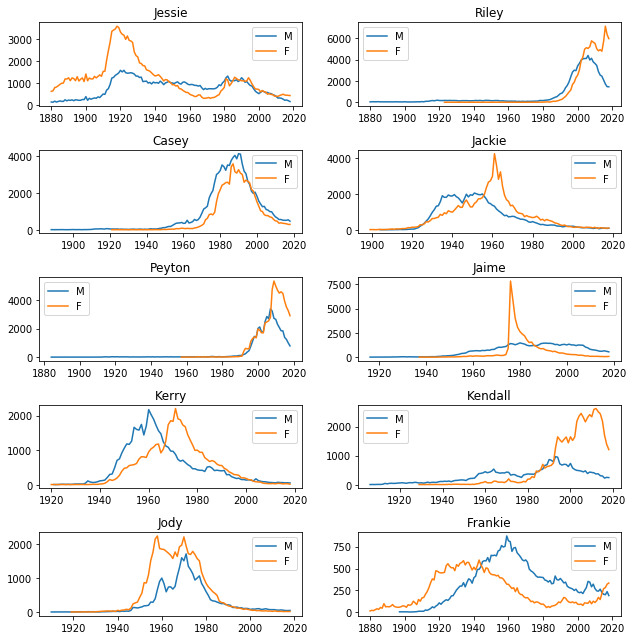

In [225]:
plt.figure(figsize=(9,9))

for i, name in enumerate(common.index):
    plt.subplot(5,2,i+1)
    
    plt.plot(allyears_indexed.loc['M',name], label='M')
    plt.plot(allyears_indexed.loc['F',name], label='F')
    
    plt.legend()
    plt.title(name)

plt.tight_layout()